# Intro to Deep Learning Final Project

### 1) Project Introduction and Data

1a) Overview


For my project, I was interested in the complicated issue of predicting housing prices. There's so many different factors like economics, geography, and population demographics that are all interconnected. California is one of the most important states in the United States, and I'm planning to move there soon, so I was interested in diving into the housing prices in the area to get some useful insights. I'm very interested in real estate as the primary vehicle of my investments. Additionally, this also gives me the change to apply data science techniques to a real estate oriented dataset.

For this project, I am using a dataset containing housing information from California to predict housing prices. The features in the dataset include meadian income, housig median age, average rooms per dwelling, average bedrooms per dwelling, population, average occupancy, latitude, and longitude. This is going to be a regression task and I am using deep learning techniques to construct a predictive model for housing prices.

I am going to be experiment with convolutional neural networks and recurrent neural netowrks. By comparing the performance of these modles, I am hoping to ideentify the one that gives the most accurate predictions for this use case. Additionally, I wll address any issues that came up during the modeling process, like overfitting.

The goal of this project has two purposes. First, I want to develop a robust predictive model of Californian home prices. I want this to be able to assist an real estate investors or prospective homeowners, such as myself. Another purpose is that this exercise gives me more practice in applying the deep learning teachniques learned to real estate, an industry I'm very interested in.

1b) Data Source

The dataset I am using for this project is a California Housing dataset. The dataset was originally a part of the StatLib repository and it is maintained by Carnegie Mellon University. I am able to access the dataset through the scikit-learn dataset module. The data comes from censues data that was collected by the U.S Census Bureau. The dataset uses an interesting clustering of communities called a block group. It's essentially the smallest geographical unit that the Census Bureau uses to define an area.

The California Housing dataset consists of 20,640 rows and 8 numeric features. Each row is referring to a block group. Below are the features within the dataset:

1. MedInc: Median income in block
2. HouseAge: Median house age in block
3. AveRooms: Average number of rooms
4. AveBedrms: Average number of bedrooms
5. Population: Block population
6. AveOccup: Average house occupancy
7. Latitude: House block latitude
8. Longitude: House block longitude

The target variable is MedHouseVal will represent the median house value for households in each block. The features are all continuous numerical values. The dataset is in a tabular format. The ~20k rows makes this dataset not a particularly huge one.

Below is a link to the dataset, along with the metadata to describe it:
Scikit-learn developers. (2020). California Housing dataset. Scikit-learn: Machine Learning in Python. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

### 2) Exploratory Data Anaysis - Inspect, Visualize, and Clean the Data

Upon loading the data, I checked for the most common issues that may require cleaning. I ensured that the data was loaded as a DataFrame, and a target column was added. After checking for missing values and duplicates in the dataset, it was obvious that the dataset was quite clean.

To further explore the data, I checked the distribution of the target variable, MedHouseVal, to understand the range of the data and to identify any outliers or unexpected values. Additionally, I examined the correlations between the variables since a high correlation between the predictors can lead to multicollinearity within the regression model, causing model instability.

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object
0


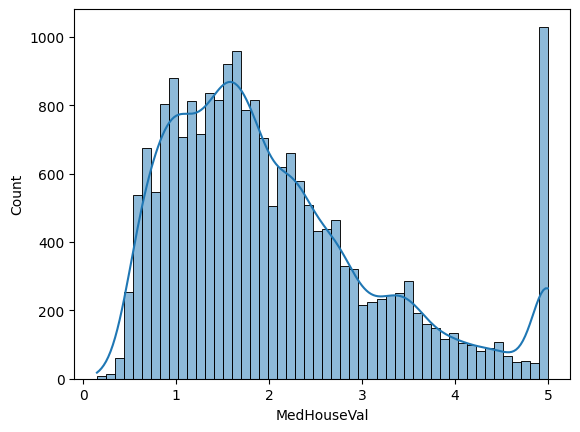

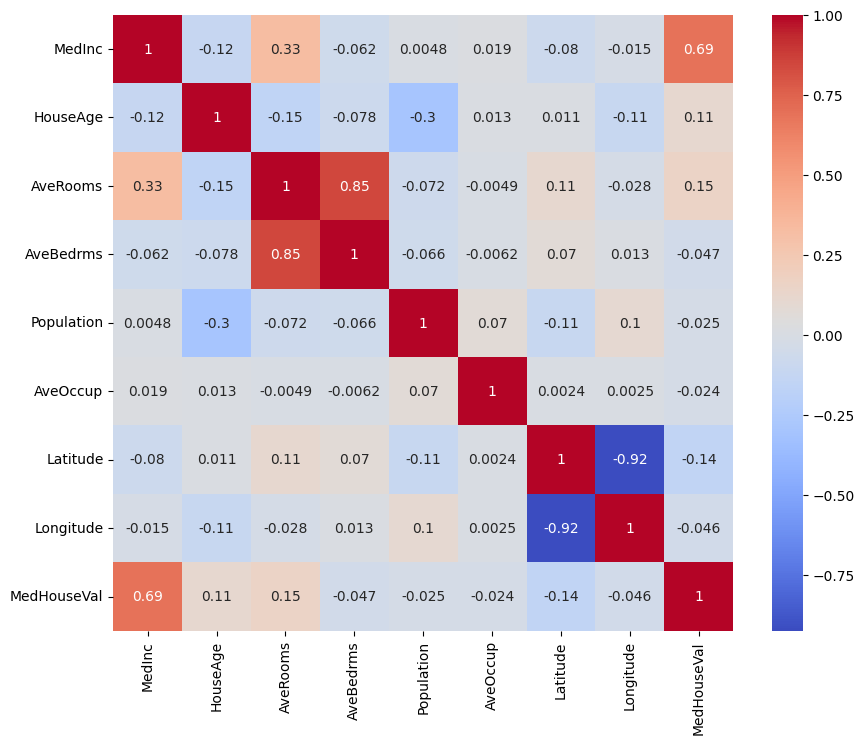

In [8]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# I'm loading the data and checking for missing values, duplicates, and data types
housing = fetch_california_housing(as_frame=True)
df = housing['data']
df['MedHouseVal'] = housing['target']

print(df.isnull().sum())
print(df.dtypes)
print(df.duplicated().sum())

sns.histplot(df['MedHouseVal'], bins=50, kde=True)
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

The California Housing dataset is very clean based on my checking. I didn't spot any missing values or duplicates. The data types also make sense. There is a little bit of correlation between the predictors, but it's not to a level where it will cause a probelm with the models we use.

One thing I decided to do is clean up the column names and make them into names that are easier to understand and are more descriptive.

In [9]:
# I want to check my current column names
print("Current column names:", df.columns)

# The new column names I want for my features
new_columns = {
    "MedInc": "MedianIncome",
    "HouseAge": "HouseAge",
    "AveRooms": "AverageRooms",
    "AveBedrms": "AverageBedrooms",
    "Population": "Population",
    "AveOccup": "AverageOccupants",
    "Latitude": "Latitude",
    "Longitude": "Longitude",
    "MedHouseVal": "MedianHouseValue"
}

# This is so that I can rename the columns
df.rename(columns=new_columns, inplace=True)

print("Updated column names:", df.columns)

Current column names: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')
Updated column names: Index(['MedianIncome', 'HouseAge', 'AverageRooms', 'AverageBedrooms',
       'Population', 'AverageOccupants', 'Latitude', 'Longitude',
       'MedianHouseValue'],
      dtype='object')


To start off my exploratory data analysis, I started off by creating histograms and a correlation matrix. I also looked at the outliers.

I decided to use histograms to check the distribution of each features. It gives me an idea of how skewed the data is and what kind of distribution the feature are. The correlation matrix gives me an idea of the relationship between features. In the correlation matix, the more red it is, the more there is a positive correlation, while a dark blue represents a negative correlation. I also created boxplots so that I could see the dispersion of the data some more.

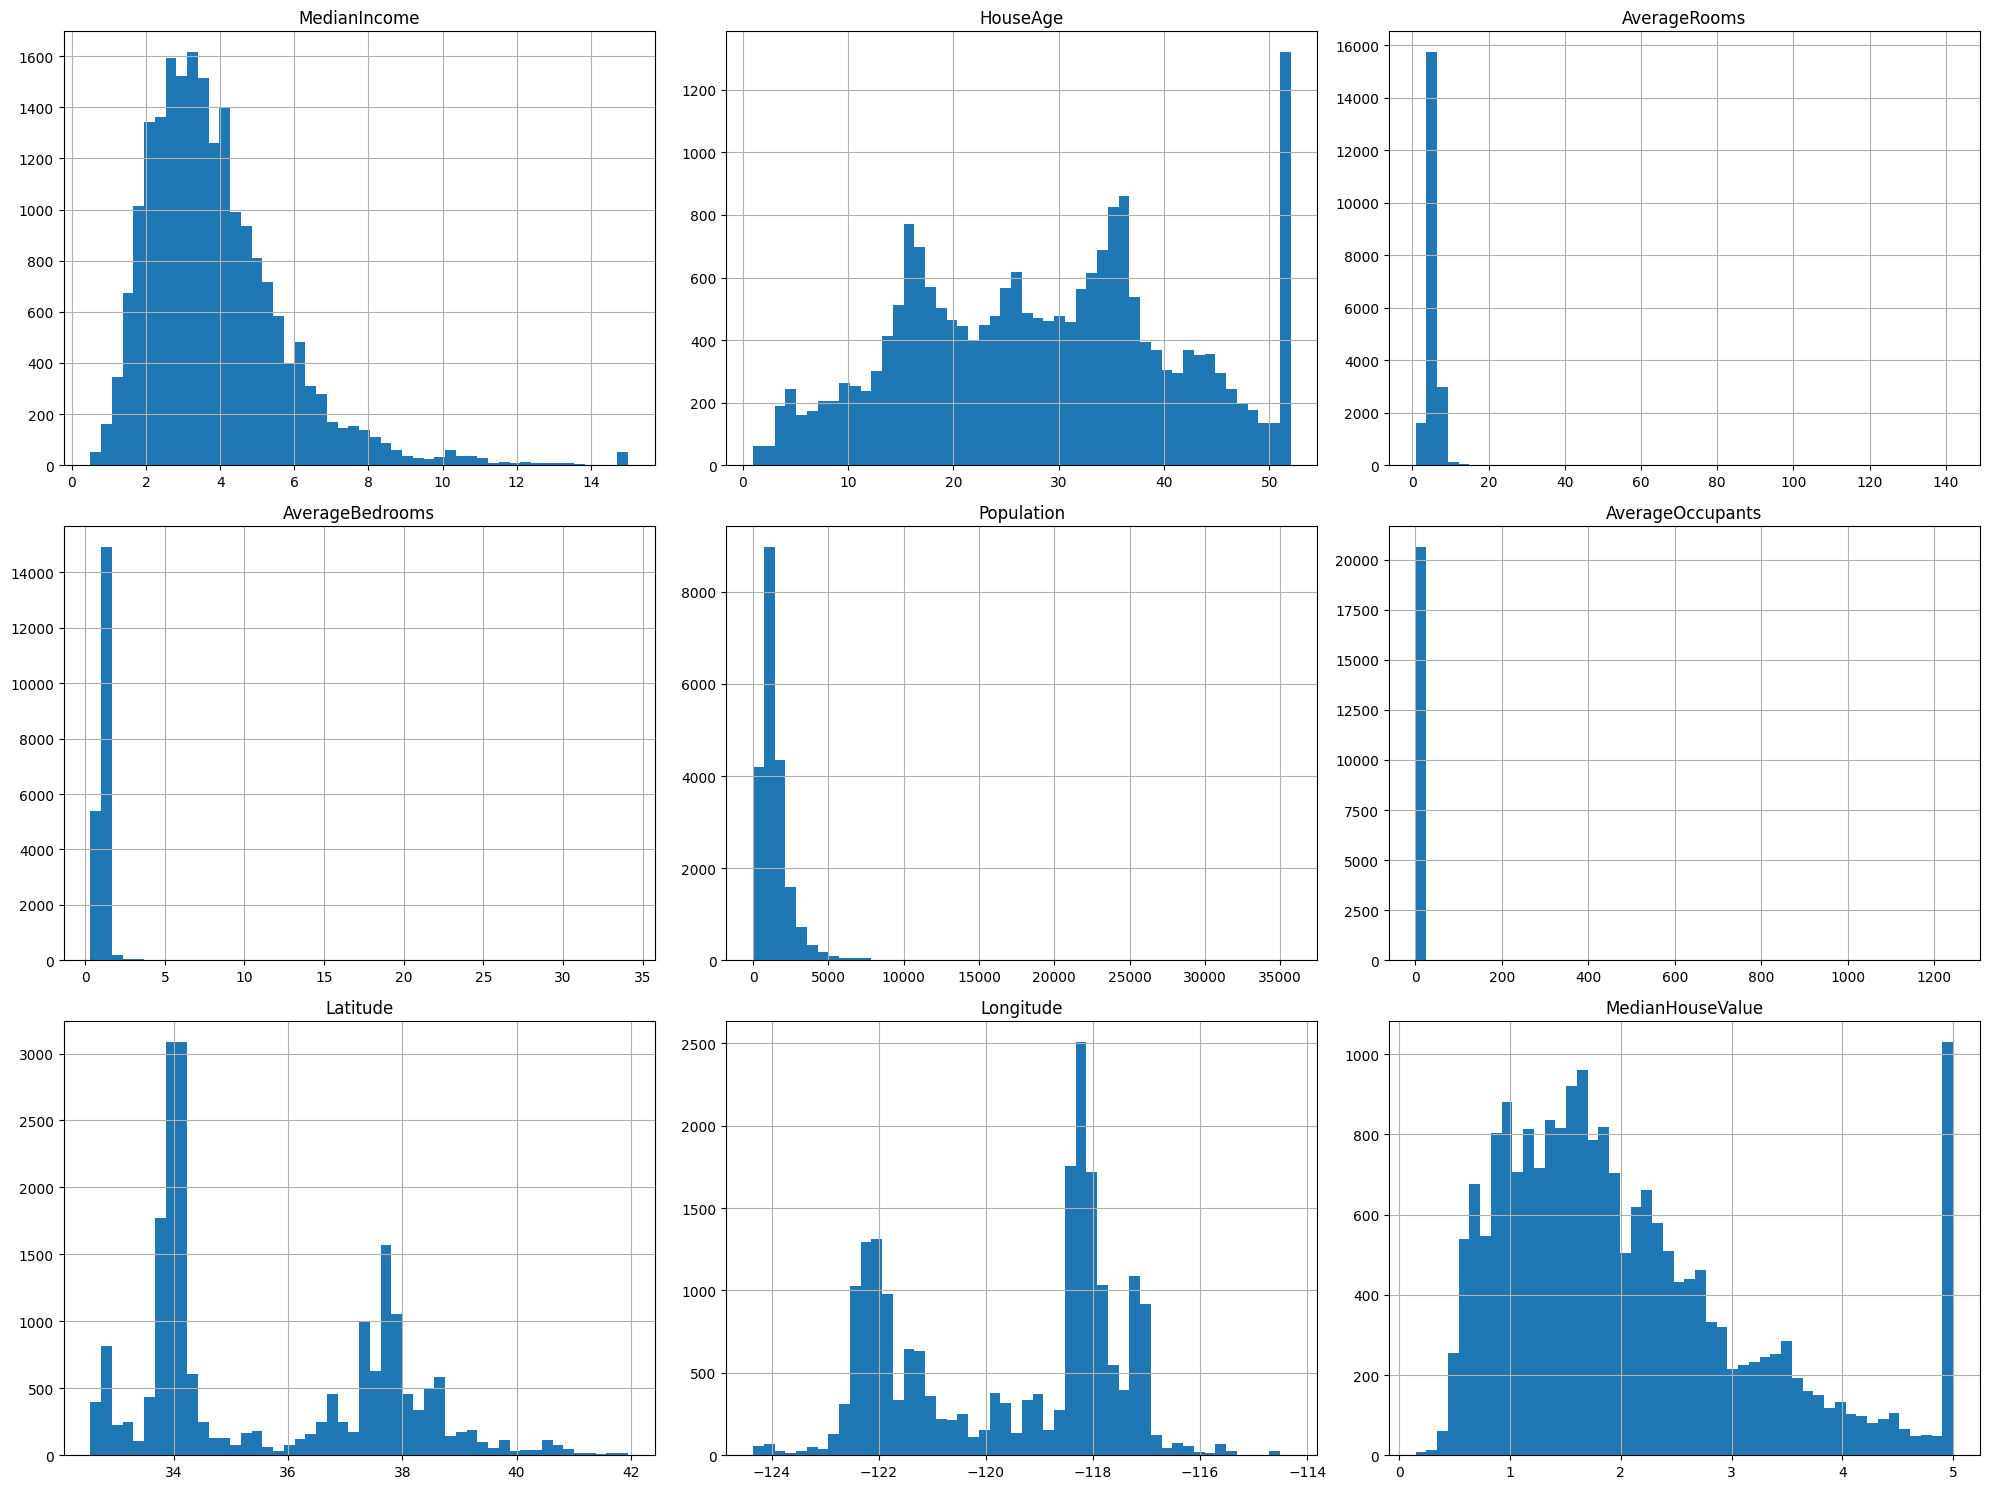

In [10]:
# This is to graph my histograms so that I can visualize the distribution of numeric values
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

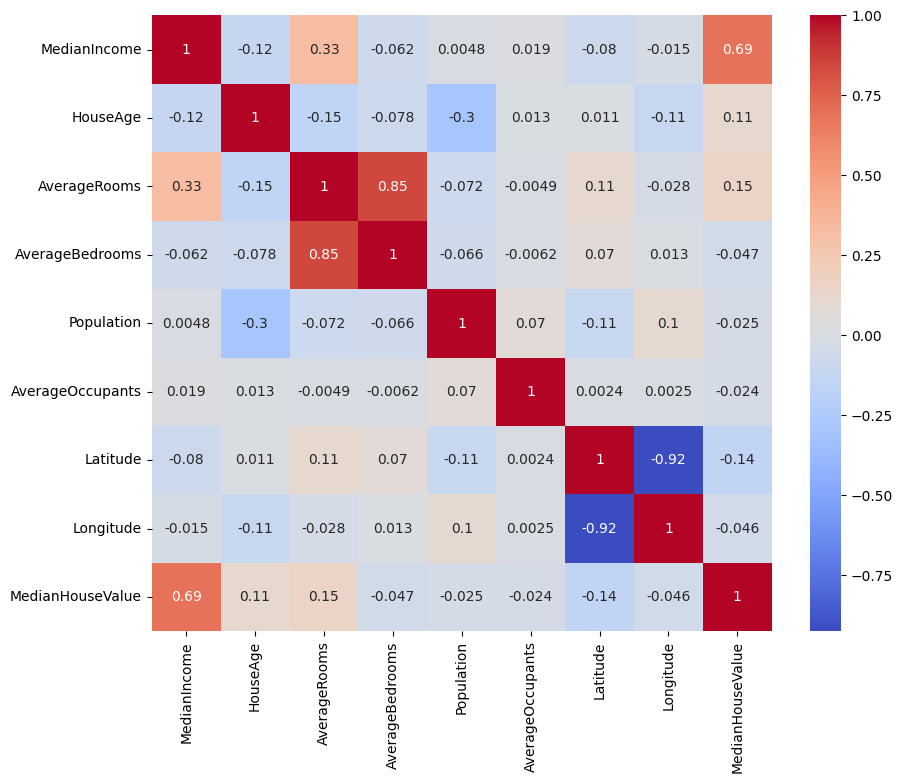

In [11]:
# This is to generate my heatmap of the features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

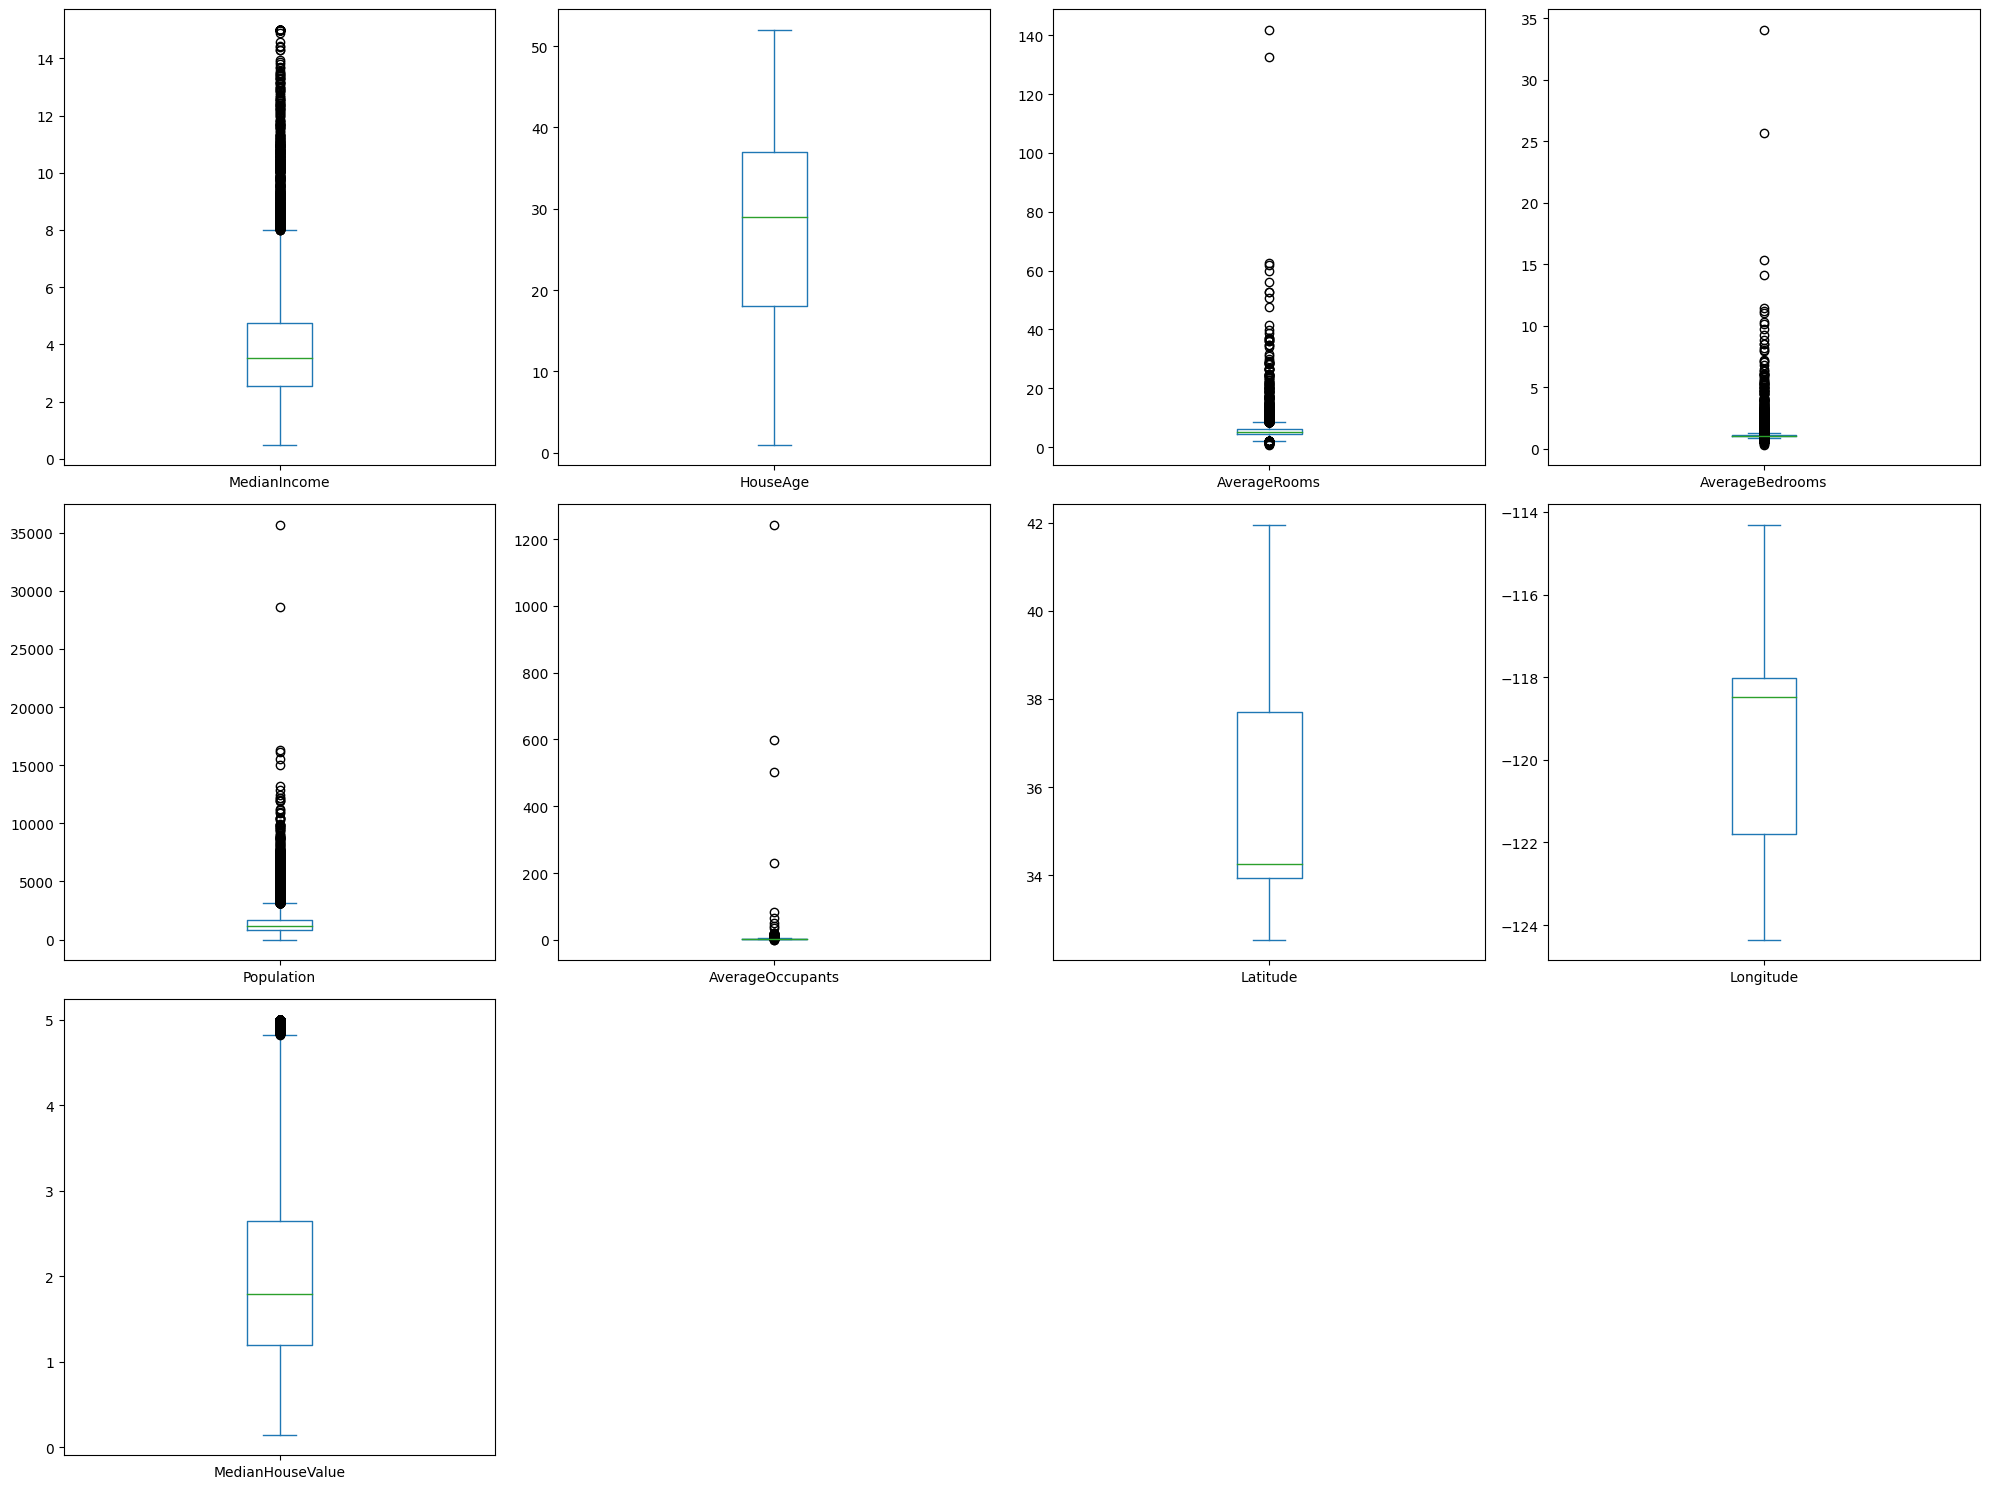

In [12]:
# This is my boxplots
df.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(20,15))
plt.tight_layout()
plt.show()

The histograms provide insights in the distribution of each feature in the dataset. The MedianIncome is right skewed. This indicates to me that there are a few blocks in the area that have a much higher median income. HouseAge is pretty unifomr, so that tells me that the ages of the houses are spread evenly in the dataset. AverageRooms and Average Bedrooms are both right skewed, which highlights that most blocks have a small number of rooms and bedrooms aside from some exceptions. Population is also right skewed which means there are a few denely populated blocks where a lot more people live like center of a town or city. AverageOccupants is right skewed so there's a few instances where a home has a lot of occupants. Latitude and Longitiude shows clusters of values, which gives us an idea how how bloks are grouped in certain geographical areas. MedianHouseValue is right skewed, which indicates that there's some blocks with a really high median house values.

Looking at the heapmap, I noticed some correlations between the factors. The MedianIncome is positively correlated with the MedianHouseValue. This make sense since higher income neighborhoods will likley have more expensive homes. There's a negative corrleation betwween Latitude and MedianHouseValue, which suggests to me that the house value decreases towards the north side. The rest fo the correlations aren't as material.

In the histograms, I saw that the features have different scales and distributions. The outliers in the boxplots and make me consider rescaling my features. I decided to rescale them so that it's easier for me to handle when I'm building models.

In [14]:
from sklearn.preprocessing import StandardScaler

# I'm Separating the features and the target
X = df.drop('MedianHouseValue', axis=1)
y = df['MedianHouseValue']

# I'm standardizing the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

I separated the features and then standardized them. This way the features have a mean of 0 and a standard deviation of 1, which shoud make it a lot easier for me to train my models on.

Based on exploring the data, I do expect certain features in the dataset to have more impact on the house prices than others. I expect MedianIncome to be highly correlated with the MedianHouseValue since higher income levels in an area usually lead to higher home prices. I also expect HouseAge to play a big role since newer houses might be prices higher due to lower maintenance costs, newer amenities, and a more modern design. I think Latitude and Longitude will have a strong influence since real estate prices are all about location. A crappy small home in the middle of a city is likely going to be worth a lot more than a decent home an hour away from the city. I am expecting my hypothesis to be confirmed through the models.

### 3) Perform Analysis Using Deep Learning Models of your Choice, Present Discussion, and Conclusions

For my model selection, I decided to try building a convolutional neural network (CNN) and a recurrent neural network (RNN).


go with linear regression, decision tree, and random forest models to predict the house prices in the california housing dataset. The reason I'm going with this is because it gives me a good blend of models of various complexity that I can compare model performance with. The linear regression model is the simplest model. The decision tree model is a bit more complex and a random forest model is a bit more complex than the decision tree.  

In [16]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Reshaping the data for CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Building a simple CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=1)

# Building a simple RNN model
from keras.layers import SimpleRNN

rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

rnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
516/516 [==============================] - 4s 3ms/step - loss: 0.8772
Epoch 2/10
516/516 [==============================] - 2s 3ms/step - loss: 0.5033
Epoch 3/10
516/516 [==============================] - 1s 2ms/step - loss: 0.4503
Epoch 4/10
516/516 [==============================] - 1s 1ms/step - loss: 0.5002
Epoch 5/10
516/516 [==============================] - 1s 1ms/step - loss: 0.4421
Epoch 6/10
516/516 [==============================] - 1s 1ms/step - loss: 0.3884
Epoch 7/10
516/516 [==============================] - 1s 1ms/step - loss: 0.3716
Epoch 8/10
516/516 [==============================] - 1s 1ms/step - loss: 0.3673
Epoch 9/10
516/516 [==============================] - 1s 1ms/step - loss: 0.3552
Epoch 10/10
516/516 [==============================] - 1s 1ms/step - loss: 0.4108
Epoch 1/10
516/516 [==============================] - 2s 2ms/step - loss: 1.1002
Epoch 2/10
516/516 [==============================] - 1s 2ms/step - loss: 0.4635
Epoch 3/10
516/516 [=======

#### Results Analysis - Evaluating Models

In [17]:
cnn_loss = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print('CNN Test loss:', cnn_loss)

rnn_loss = rnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print('RNN Test loss:', rnn_loss)

CNN Test loss: 0.3650326728820801
RNN Test loss: 0.37114182114601135


The CNN model performed a little bit better in my project. It has a test loss of 0.365, while the RNN had a test loss of 0.371. One reason for this might be because CNNs are good at finding patterns in data, especially related to a spatial structure. The way I standardized my data likely make the difference in making the CNN model superior to RNN. RNN's are generally better for time series data or text analysis, neither of which is related to my project, so it makes sense that RNN'sstrengths weren't fully utilized. Overall, CNN was better in this use case, even if it was only by a small margin.